In [53]:

import numpy as np
import random

# Set the seeds for reproducibility
np.random.seed(42)
random.seed(42)

# If you're using TensorFlow/Keras or PyTorch, uncomment the following lines:
# import tensorflow as tf
# tf.random.set_seed(42)
# import torch
# torch.manual_seed(42)


Necessary Imports

In [54]:
# necessary imports

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

Loading Data

In [55]:
# loading data

import pandas as pd

# Load both datasets
df1 = pd.read_csv('Kidney_data.csv')
df2 = pd.read_csv('kidney_disease (1).csv')

# Concatenate the two dataframes
df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Check the first few rows of the merged dataframe
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [56]:
df.shape
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [57]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [58]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [59]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              348 no

In [61]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              348 no

In [63]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [64]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [65]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [66]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [67]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



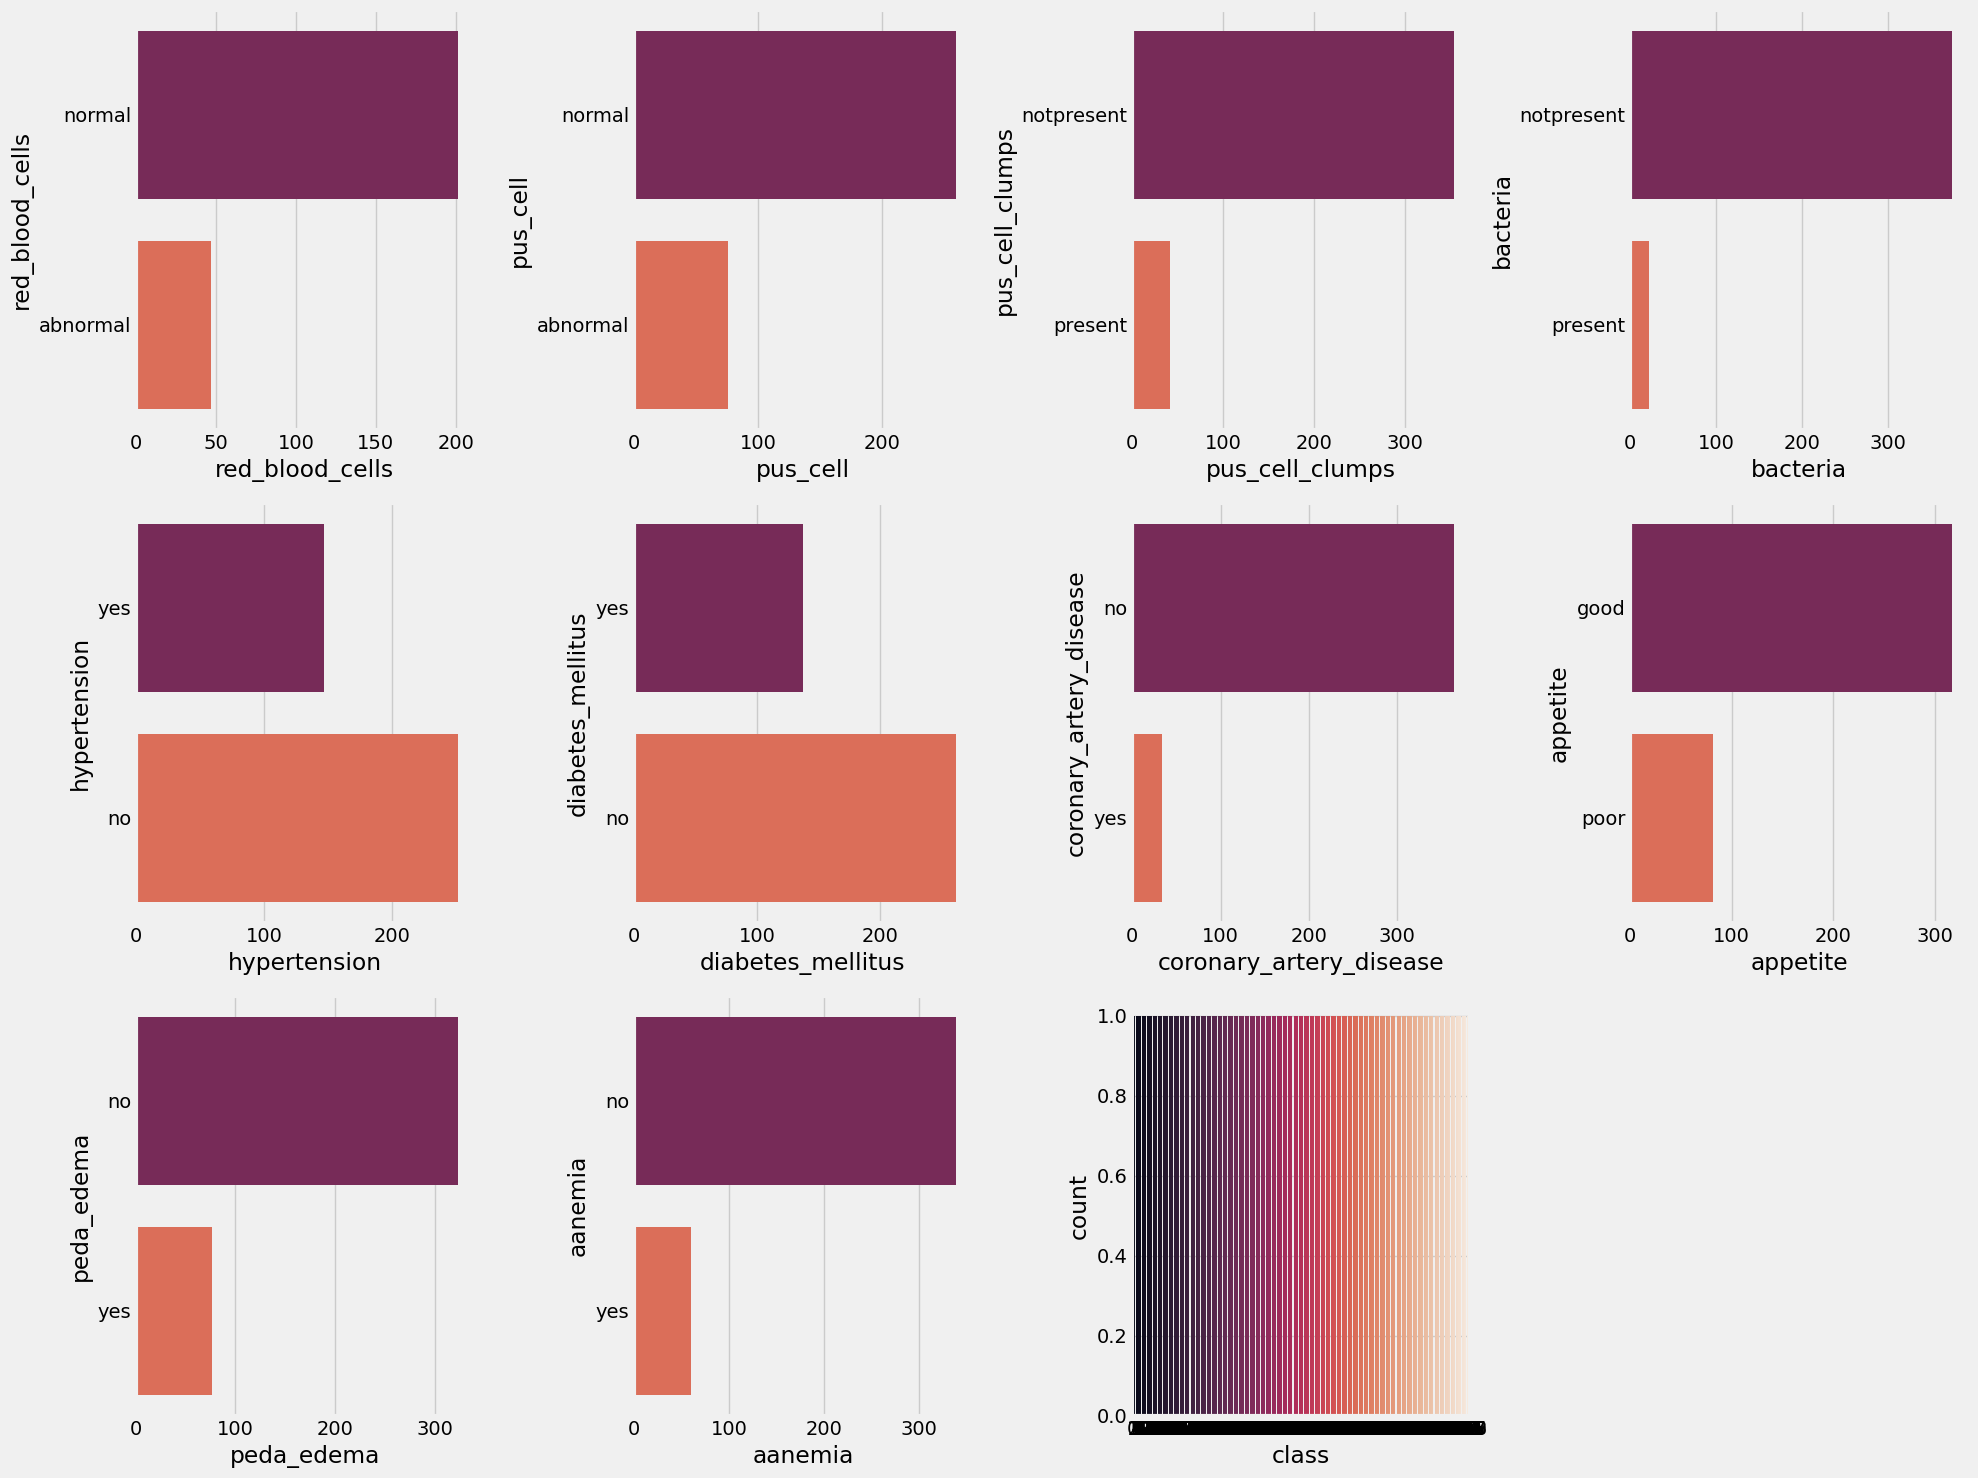

In [68]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

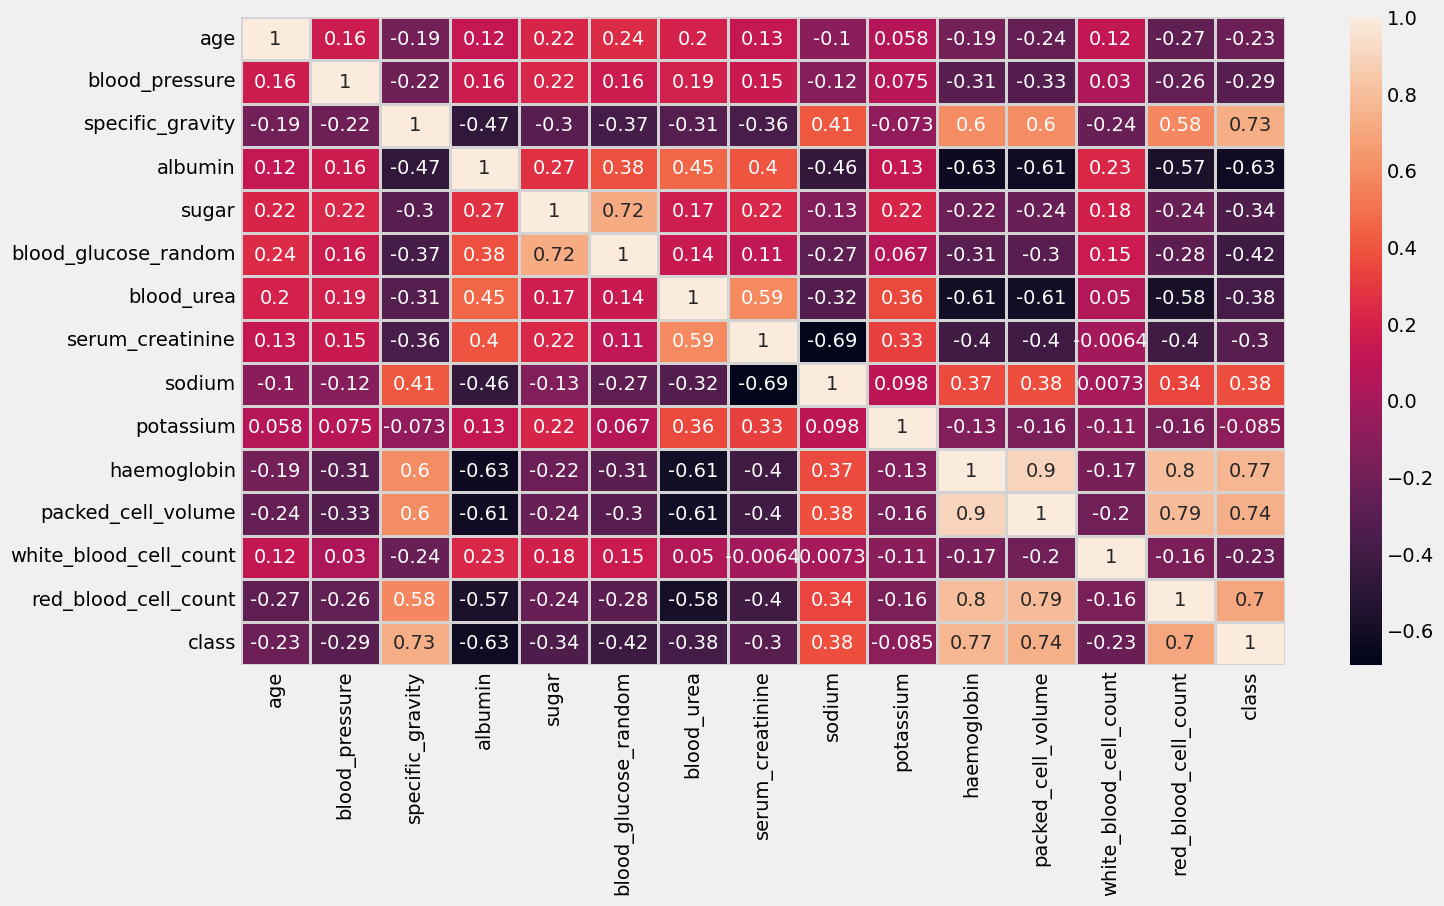

In [69]:
# heatmap of data

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns from the DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()

In [70]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

Data Preprocessing

In [71]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [72]:
df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [73]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [74]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [75]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [76]:
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [77]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [78]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


Feature Encoding

In [79]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [81]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,134.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,18.0,0.8,140.0,5.0,11.3,38.0,6000.0,4.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,132.0,4.6,9.6,31.0,7500.0,5.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,139.0,3.8,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


Model Building

In [82]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

Spliting train and test datasets

In [83]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7857142857142857
Test Accuracy of KNN is 0.7 

Confusion Matrix :- 
[[49 27]
 [ 9 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        76
           1       0.56      0.80      0.66        44

    accuracy                           0.70       120
   macro avg       0.70      0.72      0.70       120
weighted avg       0.74      0.70      0.71       120



Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[73  3]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [86]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [87]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.9678571428571429


In [88]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.975
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[73  3]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=11, max_features='sqrt',
                                min_samples_leaf=2, min_samples_split=3, n_estimators=130)

# Fit the model
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9928571428571429
Test Accuracy of Random Forest Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[75  1]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



ADA Boost CLassifier

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of logistic regression

logreg_acc = accuracy_score(y_test, logreg.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {logreg_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, logreg.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, logreg.predict(X_test))}")


Training Accuracy of Logistic Regression is 0.9071428571428571
Test Accuracy of Logistic Regression is 0.875 

Confusion Matrix :- 
[[67  9]
 [ 6 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        76
           1       0.81      0.86      0.84        44

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



Gradient Boost Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, )
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[74  2]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



XG Boost Classifier

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[74  2]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



Models Comparision

In [93]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regression',
             'Gradient Boosting Classifier','XgBoost'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, logreg_acc, gb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.991667
4,Gradient Boosting Classifier,0.983333
5,XgBoost,0.983333
1,Decision Tree Classifier,0.975000
3,Logistic Regression,0.875000
0,KNN,0.700000


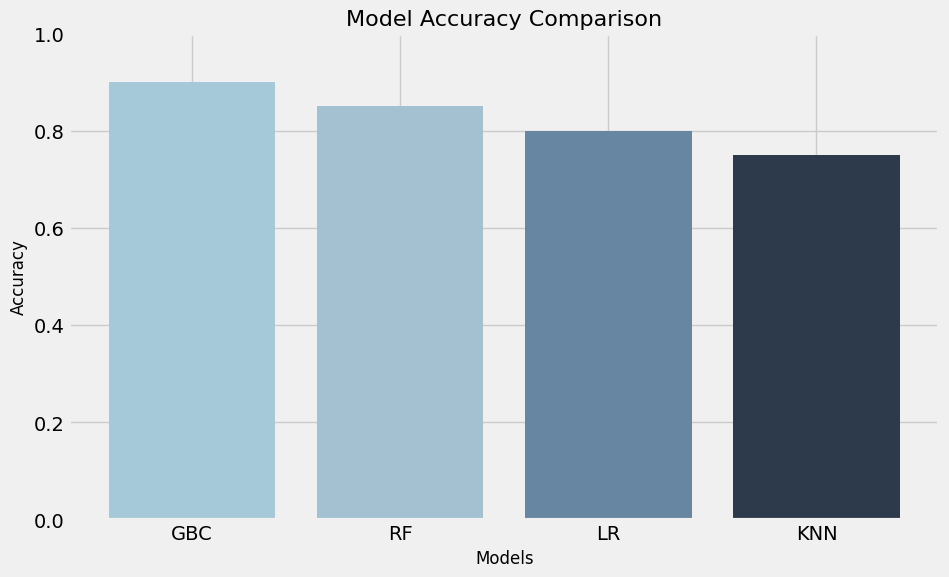

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample accuracy values, replace these with your actual values
knn_acc = 0.75
rd_clf_acc = 0.85
logreg_acc = 0.80
gb_acc = 0.90

# DataFrame for models and their corresponding accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'RF', 'LR', 'GBC'],
    'Score': [knn_acc, rd_clf_acc, logreg_acc, gb_acc]
})

# Sort models by accuracy score in descending order
models = models.sort_values(by='Score', ascending=False)

# Custom colors based on the provided image (matching color tones)
colors = ['#A6C9D9', '#A3C1D1', '#6786A1', '#2D3A4B']  # Light to dark shades of blue

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models['Model'], models['Score'], color=colors)

# Adding labels and title
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

# Display the chart
plt.show()


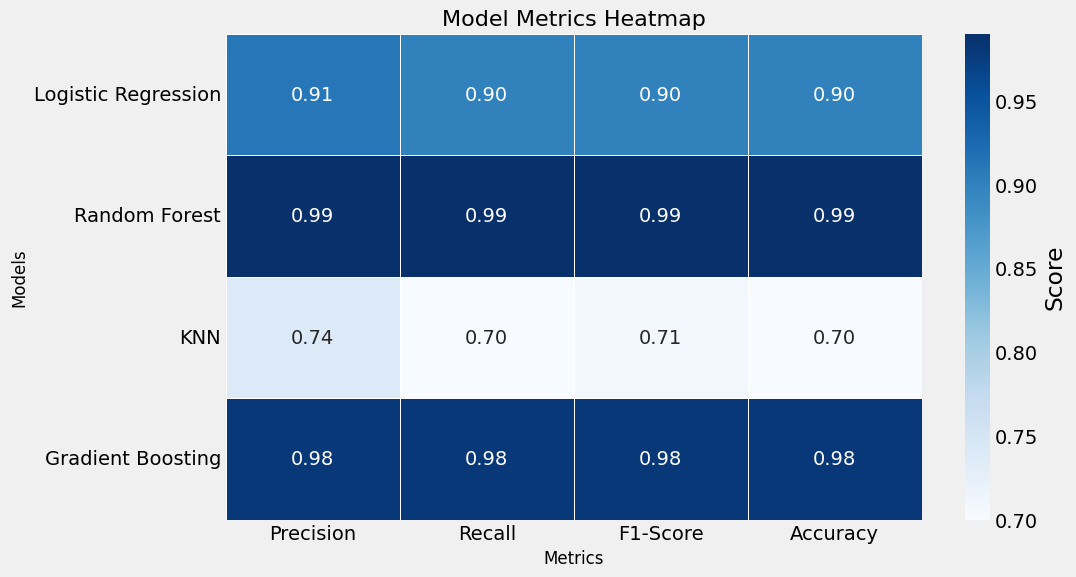

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example metrics for Logistic Regression, Random Forest, K-NN, and Gradient Boosting (replace these with your actual values)
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Gradient Boosting'],
    'Precision': [0.91, 0.99, 0.74, 0.98],  # Example Precision values
    'Recall': [0.90, 0.99, 0.70, 0.98],  # Example Recall values
    'F1-Score': [0.90, 0.99, 0.71, 0.98],  # Example F1-Score values
    'Accuracy': [0.90, 0.99, 0.70, 0.98]  # Example Accuracy values
}

# Create DataFrame from metrics
df_metrics = pd.DataFrame(metrics)

# Set 'Model' as the index for better formatting
df_metrics.set_index('Model', inplace=True)

# Create a heatmap with custom color map
plt.figure(figsize=(10, 6))
sns.heatmap(df_metrics, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Score'})

# Set title and labels
plt.title('Model Metrics Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)

# Display the heatmap
plt.show()


In [94]:
with open('kidney_disease_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [95]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming your trained models are defined as follows:
models = [knn, dtc, rd_clf, logreg, gb, xgb]  # Replace these with your actual model variable names
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'XGBoost']

# Print the header of the table
print(f"{'Model':<20} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Accuracy':<10}")
print("-" * 70)

# Evaluate each model and print the results
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)  # Replace with your actual test dataset
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results in a formatted way
    print(f"{name:<20} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {accuracy:<10.4f}")


Model                Precision  Recall     F1-Score   Accuracy  
----------------------------------------------------------------------
KNN                  0.7420     0.7000     0.7053     0.7000    
Decision Tree        0.9766     0.9750     0.9752     0.9750    
Random Forest        0.9919     0.9917     0.9917     0.9917    
Logistic Regression  0.8777     0.8750     0.8758     0.8750    
Gradient Boosting    0.9841     0.9833     0.9834     0.9833    
XGBoost              0.9841     0.9833     0.9834     0.9833    


In [96]:
# Split the training data further into train and validation sets
X_train_subset, X_val, y_train_subset, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

def objective_function(selected_features):
    if not any(selected_features):  # Check for empty feature subset
        return 0.0
    # Create a subset of data using selected features
    X_subset = X_train_subset.iloc[:, selected_features]
    X_val_subset = X_val.iloc[:, selected_features]  # Use validation set

    # Train and evaluate a model (e.g., XGBoost)
    xgb_model = XGBClassifier()
    xgb_model.fit(X_subset, y_train_subset)
    y_pred = xgb_model.predict(X_val_subset)  # Evaluate on validation set
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Cat Swarm Optimization
def cso(num_cats, iterations, seeking_memory_pool, mixture_ratio, random_state=42):
    # Initialize cats with random positions (feature subsets)
    random.seed(random_state)  # Set random seed for reproducibility
    np.random.seed(random_state)
    dimension = X_train.shape[1]
    cat_positions = [[random.randint(0, 1) for _ in range(dimension)] for _ in range(num_cats)]

    # Initialize best_cat_position with the first cat's position
    best_cat_position = cat_positions[0][:]
    best_fitness = objective_function(np.where(best_cat_position)[0])

    for _ in range(iterations):
        # Seeking mode
        for i in range(int(num_cats * mixture_ratio)):
            candidate_positions = []
            for j in range(seeking_memory_pool):
                # Create candidate positions by flipping bits in current position
                candidate_position = cat_positions[i][:]
                for k in range(dimension):
                    if random.random() < 0.2:  # Probability of flipping a bit
                        candidate_position[k] = 1 - candidate_position[k]
                candidate_positions.append(candidate_position)

            # Evaluate fitness of candidate positions
            fitness_values = [objective_function(np.where(pos)[0]) for pos in candidate_positions]
            best_candidate_index = np.argmax(fitness_values)
            cat_positions[i] = candidate_positions[best_candidate_index]

        # Tracing mode
        for i in range(int(num_cats * (1 - mixture_ratio))):
            if best_cat_position is not None:  # Check if best_cat_position is initialized
                velocity = [int((best_cat_position[j] - cat_positions[i][j]) * random.uniform(0.1, 0.3)) for j in range(dimension)]
                cat_positions[i] = [int(cat_positions[i][j] + velocity[j]) for j in range(dimension)]
                cat_positions[i] = [1 if pos > 0.5 else 0 for pos in cat_positions[i]]
            else:
                # Handle the case where best_cat_position is not yet initialized
                pass

        # Update best cat position
        fitness_values = [objective_function(np.where(pos)[0]) for pos in cat_positions]
        best_cat_index = np.argmax(fitness_values)
        current_best_fitness = fitness_values[best_cat_index]

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_cat_position = cat_positions[best_cat_index]

    # Return the selected features
    selected_features = np.where(best_cat_position)[0]
    return selected_features

In [47]:
# Call the CSO function to get selected features
num_cats = 20
iterations = 50
seeking_memory_pool = 4
mixture_ratio = 0.8
selected_features = cso(num_cats, iterations, seeking_memory_pool, mixture_ratio)
print("Selected Features:", selected_features)
# Create a subset of the data using selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

Selected Features: [ 1  2  3  6 15 19 21 23]


In [48]:
# Decision Tree with fixed random state
dt_selected = DecisionTreeClassifier(
    criterion='entropy', max_depth=7, max_features='sqrt',
    min_samples_leaf=3, min_samples_split=7, splitter='best', random_state=42
)
dt_selected.fit(X_train_selected, y_train)
dt_acc_selected = accuracy_score(y_test, dt_selected.predict(X_test_selected))
print(f"Test Accuracy of Decision Tree with Selected Features: {dt_acc_selected}")
print(f"Classification Report of Decision Tree with Selected Features:\n {classification_report(y_test, dt_selected.predict(X_test_selected))}")

# K-Nearest Neighbors (KNN) – no randomness, so no random state is needed
knn_selected = KNeighborsClassifier()
knn_selected.fit(X_train_selected, y_train)
knn_acc_selected = accuracy_score(y_test, knn_selected.predict(X_test_selected))
print(f"Test Accuracy of KNN with Selected Features: {knn_acc_selected}")
print(f"Classification Report of KNN with Selected Features:\n {classification_report(y_test, knn_selected.predict(X_test_selected))}")

# Logistic Regression with fixed random state
logreg_selected = LogisticRegression(random_state=42)
logreg_selected.fit(X_train_selected, y_train)
logreg_acc_selected = accuracy_score(y_test, logreg_selected.predict(X_test_selected))
print(f"Test Accuracy of Logistic Regression with Selected Features: {logreg_acc_selected}")
print(f"Classification Report of Logistic Regression with Selected Features:\n {classification_report(y_test, logreg_selected.predict(X_test_selected))}")

Test Accuracy of Decision Tree with Selected Features: 0.9833333333333333
Classification Report of Decision Tree with Selected Features:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

Test Accuracy of KNN with Selected Features: 0.925
Classification Report of KNN with Selected Features:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        76
           1       0.83      1.00      0.91        44

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.94      0.93      0.93       120

Test Accuracy of Logistic Regression with Selected Features: 0.975
Classification Report of Logistic Re

In [49]:
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.svm import SVC


# 3. AdaBoost Classifier with fixed random state
ada_selected = AdaBoostClassifier(random_state=42)
ada_selected.fit(X_train_selected, y_train)
ada_acc_selected = accuracy_score(y_test, ada_selected.predict(X_test_selected))
print(f"Accuracy of AdaBoost (Selected Features): {ada_acc_selected}")
print(classification_report(y_test, ada_selected.predict(X_test_selected)))


# Gradient Boosting Classifier with fixed random state
gb_selected = GradientBoostingClassifier(random_state=42)
gb_selected.fit(X_train_selected, y_train)
gb_acc_selected = accuracy_score(y_test, gb_selected.predict(X_test_selected))
print(f"Accuracy of Gradient Boosting (Selected Features): {gb_acc_selected}")
print(classification_report(y_test, gb_selected.predict(X_test_selected)))

# XGBoost Classifier with fixed random state
xgb_selected = XGBClassifier(random_state=42, objective='binary:logistic',
                            learning_rate=0.5, max_depth=5, n_estimators=150)
xgb_selected.fit(X_train_selected, y_train)
xgb_acc_selected = accuracy_score(y_test, xgb_selected.predict(X_test_selected))
print(f"Accuracy of XGBoost (Selected Features): {xgb_acc_selected}")
print(classification_report(y_test, xgb_selected.predict(X_test_selected)))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest model with selected features
rf_selected = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=11,
                                     max_features='sqrt', min_samples_leaf=2,
                                     min_samples_split=3, n_estimators=130)
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_rf_selected = rf_selected.predict(X_test_selected)

# Evaluate the model's performance
rf_acc_selected = accuracy_score(y_test, y_pred_rf_selected)
print(f"Accuracy of Random Forest (Selected Features): {rf_acc_selected}")
print(classification_report(y_test, y_pred_rf_selected))

svm_selected = SVC(random_state=42)  # Initialize SVM classifier
svm_selected.fit(X_train_selected, y_train)  # Train on selected features
y_pred_svm_selected = svm_selected.predict(X_test_selected)  # Predict on test set
svm_acc_selected = accuracy_score(y_test, y_pred_svm_selected)  # Calculate accuracy
print(f"Accuracy of SVM (Selected Features): {svm_acc_selected}")
print(classification_report(y_test, y_pred_svm_selected))  # Print classification report

Accuracy of AdaBoost (Selected Features): 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

Accuracy of Gradient Boosting (Selected Features): 0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy of XGBoost (Selected Features): 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    

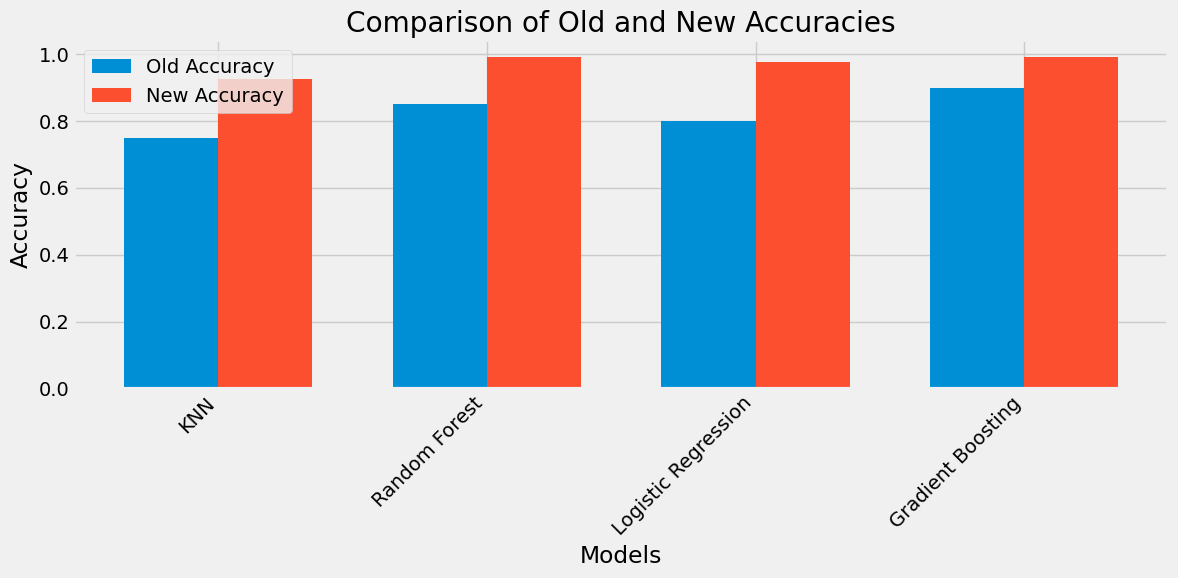

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the old and new accuracies stored in variables
old_accuracies = [knn_acc, rd_clf_acc, logreg_acc, gb_acc]
new_accuracies = [knn_acc_selected, rf_acc_selected, logreg_acc_selected, gb_acc_selected]
model_names = ['KNN', 'Random Forest', 'Logistic Regression', 'Gradient Boosting',] # Removed 'Random Forest' as it's not in the accuracies lists


# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(model_names)) # Now index will have the correct length

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(index, old_accuracies, bar_width, label='Old Accuracy')
plt.bar(index + bar_width, new_accuracies, bar_width, label='New Accuracy')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Old and New Accuracies')
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
!pip install tabulate
import pandas as pd
from tabulate import tabulate

# Assuming you have the old and new accuracies stored in variables
old_accuracies = [knn_acc, rd_clf_acc, logreg_acc, gb_acc]
new_accuracies = [knn_acc_selected, rf_acc_selected, logreg_acc_selected, gb_acc_selected]
model_names = ['KNN', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']

# Create a dictionary to store the data
data = {
    'Model': model_names,
    'Old Accuracy': old_accuracies,
    'New Accuracy': new_accuracies
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the table using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------------------+----------------+----------------+
|    | Model               |   Old Accuracy |   New Accuracy |
|----+---------------------+----------------+----------------|
|  0 | KNN                 |           0.75 |       0.925    |
|  1 | Random Forest       |           0.85 |       0.991667 |
|  2 | Logistic Regression |           0.8  |       0.975    |
|  3 | Gradient Boosting   |           0.9  |       0.991667 |
+----+---------------------+----------------+----------------+
